In [6]:
!pip3 install essentia

     |████████████████████████████████| 12.0 MB 176 kB/s 


In [7]:
!pip3 install madmom

     |████████████████████████████████| 20.0 MB 1.3 MB/s 
     |████████████████████████████████| 51 kB 6.5 MB/s 
  Created wheel for madmom: filename=madmom-0.16.1-cp37-cp37m-linux_x86_64.whl size=20934174 sha256=69eb6ca096bc56bcbd6bfefd24f3da0d0396b12bc24df3bdaea412e4c2b27bd7
  Stored in directory: /root/.cache/pip/wheels/af/90/61/393ceef814b55b12d1b59b5ed3a2b2a3457a55d39b7363b975
Successfully built madmom


In [8]:
!pip3 install mir_eval

     |████████████████████████████████| 87 kB 6.3 MB/s 
  Created wheel for mir-eval: filename=mir_eval-0.6-py3-none-any.whl size=96514 sha256=bca722cc03d1b1bf31a0ab7738fe73c9adeb2a5e0544d9796aee921fa3609b2a
  Stored in directory: /root/.cache/pip/wheels/08/28/2d/006dbad29550bac8daf049ff34fa882655a7d3e77f3b67595e
Successfully built mir-eval


The section below is all path dependent

In [9]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = 'drive/MyDrive/Bass/'

import pandas as pd
import sys
sys.path.append(root)

Mounted at /content/drive


In [10]:
import madmom

In [11]:
!ls 'drive/MyDrive/Bass'

 001_beats.csv
 001_beats.gsheet
 002_beats.csv
 abesser_music
 bassunet.py
 data
 data_old
 deviations
 EnergyChecker_AllStems.ipynb
 EnergyChecker_Student_TrinityBillieJean.ipynb
 grades
 HistogramTestBillieJean.ipynb
 HistogramTestBrown.ipynb
 HistogramTestJust.ipynb
 HistogramTestRoad.ipynb
 HistogramTestWOTM.ipynb
 HistogramTestYellow.ipynb
 IEC_billieJean.csv
 __init__.py
 LICENSE
 music
 notebooks_june
 notebooks_may
 pooling.py
 __pycache__
 README.md
 SG_Student_TrinityWOTM.ipynb
 SOP_Student_TrinityBillieJean.ipynb
 statistics
 Statistics_IEC_billieJean.csv
 StudentStatistics_BillieJean.csv
 StudentStatistics_blend_justlooking.csv
 StudentStatisticsInput.csv
 tcl_annotate
 Test_Student_ONSET_TrinityYellow.ipynb
'Thesis Review Meeting.gdoc'
 txt


In [12]:
# TODO 1 optimise imports
from essentia.standard import *
from essentia import Pool, array
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
import os

import IPython
import pickle
from pickle import load
from scipy.signal import find_peaks
import ipywidgets as widgets
from scipy import signal
from lxml import etree

import plotly.express as px
import scipy
from statistics import *

In [13]:
import mir_eval
from mir_eval import *

In [14]:
!ls drive/MyDrive/Bass/deviations

billieJean0_both_osets.csv     justlooking_iec_student12.csv
billieJean10_both_osets.csv    justlooking_iec_student1.csv
billieJean11_both_osets.csv    justlooking_iec_student2.csv
billieJean12_both_osets.csv    justlooking_iec_student3.csv
billieJean13_both_osets.csv    justlooking_iec_student4.csv
billieJean14_both_osets.csv    justlooking_iec_student5.csv
billieJean15_both_osets.csv    justlooking_iec_student6.csv
billieJean1_both_osets.csv     justlooking_iec_student7.csv
billieJean2_both_osets.csv     justlooking_iec_student8.csv
billieJean3_both_osets.csv     justlooking_iec_student9.csv
billieJean4_both_osets.csv     legacy
billieJean5_both_osets.csv     onsets_wotm.csv
billieJean6_both_osets.csv     roadrunner_iec_student0.csv
billieJean7_both_osets.csv     roadrunner_iec_student1.csv
billieJean8_both_osets.csv     roadrunner_iec_student2.csv
billieJean9_both_osets.csv     roadrunner_iec_student3.csv
billieJean_iec_stem.csv        roadrunner_iec_student4.csv
billieJean_iec_stud

In [15]:
statsPath = 'drive/MyDrive/Bass/data/brown/StudentStatistics_brown.csv'
statsCols = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             "Sound Quality Mark",  " finalMark"]
df_all = pd.read_csv(statsPath, usecols=statsCols)
   

In [16]:
onset_mean_list = df_all["Onset Mean"].tolist()   
print(len(onset_mean_list))
#Student 	precision 	recall 	f_measure_value 	Onset ABS Mean 	Onset Mean 	Onset Std 	Duration ABS Mean 	Duration Mean 	Duration Std 	onsetMark 	DurationMark 	articulationMark 	soundQualityMark 	volumeControlMark 	finalMark

9


In [17]:
print(len(onset_mean_list))
m = mean(onset_mean_list)
print (onset_mean_list)

9
[-0.003, -0.002, -0.001, 0.008, 0.006999999999999999, -0.0, 0.0, -0.002, -0.001]


In [21]:
#
#
#  This allows the generation of multiple histograms by passing the K parameter.
#
#
from math import *
def multiple_hist(deviationsArray1,deviationsArray2,title_text1,title_text2,df,k):
   student_stats1 = [] # onsets
   student_stats2 = [] # durations

   list0 = df["onsetMark"].tolist()  
   list1 = df[" DurationMark"].tolist()  
   list2 = df[" TF 1 Mark "].tolist()  
   list3 = df["Sound Quality Mark"].tolist()  
   list4 = df[" finalMark"].tolist()  
   #k = 0 # Zeroth student is GT
   print("Onset Grade = ", list0[k],"\t" ,"Offset Grade = ", list1[k])
   print("\n")
   print("TF 1 Mark = ", list2[k],"Sound Q Grade = ", list3[k])
   print("Final Mark = ", list4[k])
   print("ok1")
   a= deviationsArray1
   print(a)
   m= mean(a)
   print(m)
   s = sqrt(mean(a*a))
   print("ok3")
   am = mean(abs(a))

   onset_summary= "Onset ABS Mean: %f, Onset Mean: %f,Dev. from 0: %f" %(am, m, s)
   title =   "Student "  + str(k) +title_text1
   plt.subplot(2,2,1)
   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)

   plt.subplot(2,2,2)
   a = deviationsArray2
   m, s = mean(a), sqrt(mean(a*a))
   am = mean(abs(a))
   offset_summary= "Offset ABS Mean: %f, Offset Mean: %f, Dev. from 0: %f" %(am,m, s)
   title =   "Student " + str(k) +title_text2
   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)
   plt.show()

Onset Grade =  100.0 	 Offset Grade =  100.0


TF 1 Mark =  100.0 Sound Q Grade =  100.0
Final Mark =  5.0
ok1
0     -0.005113
1     -0.002313
2      0.004898
3      0.002120
4      0.010000
         ...   
128   -0.000363
129   -0.008742
130   -0.014161
131    0.000249
132   -0.000340
Name: onset dev, Length: 133, dtype: float64
-0.002528259932330768
ok3


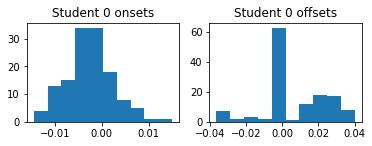

Onset Grade =  72.0 	 Offset Grade =  90.0


TF 1 Mark =  72.0 Sound Q Grade =  79.2
Final Mark =  2.7
ok1
0     0.000000
1    -0.000669
2     0.005363
3    -0.013753
4    -0.014172
5    -0.001372
6     0.016259
7    -0.004308
8     0.015000
9    -0.012075
10    0.012336
11    0.008957
12    0.007778
13    0.012188
14   -0.010011
15    0.019399
16    0.004422
17    0.002222
18   -0.006757
19    0.015896
20   -0.005000
21    0.010930
22    0.006372
23    0.010193
24   -0.009184
25    0.003458
26   -0.004331
27   -0.020000
28    0.002993
29   -0.010034
30    0.004376
31   -0.006213
32   -0.001803
33   -0.008390
34   -0.002948
35   -0.010011
36    0.016791
37   -0.019365
38    0.012993
39   -0.019615
40   -0.014161
41   -0.007540
42   -0.007528
43   -0.009728
44   -0.001927
45   -0.018696
46   -0.008685
47   -0.019274
48    0.003526
49   -0.006020
50   -0.010578
51    0.014875
52   -0.008503
53    0.017120
54   -0.008039
55   -0.010816
Name: onset dev, dtype: float64
-0.001572522339285969

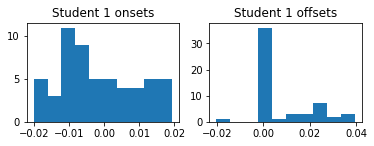

Onset Grade =  79.2 	 Offset Grade =  90.0


TF 1 Mark =  79.2 Sound Q Grade =  79.2
Final Mark =  3.6
ok1
0     0.007687
1    -0.005000
2    -0.015669
3     0.003741
4    -0.013991
        ...   
79   -0.014501
80   -0.013039
81    0.004184
82   -0.005805
83   -0.005374
Name: onset dev, Length: 84, dtype: float64
-0.0010357959047616763
ok3


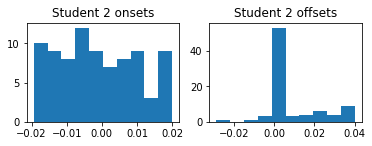

Onset Grade =  79.2 	 Offset Grade =  79.2


TF 1 Mark =  79.2 Sound Q Grade =  90.0
Final Mark =  3.6
ok1
0    -0.005102
1    -0.014637
2     0.015714
3     0.003957
4    -0.007222
5    -0.002449
6     0.012902
7     0.020000
8     0.010113
9     0.014524
10    0.006145
11    0.017993
12    0.017052
13    0.011497
14    0.018991
15   -0.006293
16    0.018118
17    0.014739
18    0.015646
19    0.011678
20   -0.003005
21   -0.000011
22   -0.000782
23    0.015839
24    0.011304
25   -0.015011
26   -0.003367
27    0.019898
28    0.005499
29    0.014909
30    0.009342
31    0.017993
32    0.019195
33   -0.003742
34    0.009660
Name: onset dev, dtype: float64
0.007745383171429181
ok3


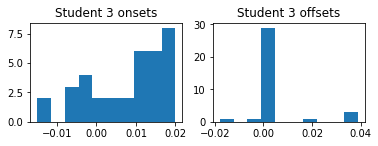

Onset Grade =  90.0 	 Offset Grade =  90.0


TF 1 Mark =  90.0 Sound Q Grade =  79.2
Final Mark =  4.5
ok1
0     0.009887
1     0.017687
2    -0.000102
3     0.002120
4     0.000363
5     0.005113
6     0.019524
7     0.013707
8     0.005091
9     0.002302
10    0.003333
11    0.005839
12    0.010249
Name: onset dev, dtype: float64
0.007316412923077455
ok3


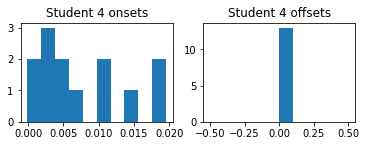

Onset Grade =  72.0 	 Offset Grade =  79.2


TF 1 Mark =  79.2 Sound Q Grade =  79.2
Final Mark =  3.6
ok1
0     0.009898
1     0.020000
2    -0.010669
3     0.003741
4     0.011009
5     0.016247
6     0.016995
7    -0.012075
8    -0.012664
9    -0.002812
10   -0.000011
11    0.014399
12    0.004841
13   -0.010578
14   -0.012778
15   -0.001757
16    0.009864
17    0.020000
18    0.019308
19   -0.009070
20   -0.001565
21    0.015000
22   -0.004184
23    0.018447
24    0.008458
25    0.005669
26   -0.015000
27   -0.017098
28   -0.005000
29   -0.015034
30   -0.015624
31   -0.001803
32   -0.013390
33   -0.015590
34    0.002041
35   -0.002029
36   -0.017619
37    0.005204
38   -0.019365
39   -0.000125
Name: onset dev, dtype: float64
-0.00036791430000011644
ok3


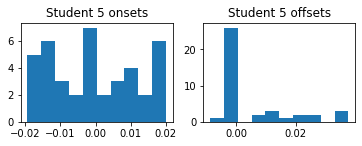

Onset Grade =  72.0 	 Offset Grade =  79.2


TF 1 Mark =  79.2 Sound Q Grade =  90.0
Final Mark =  3.6
ok1
0     0.014887
1     0.009898
2    -0.012880
3    -0.000669
4     0.006995
        ...   
59   -0.010658
60    0.019184
61    0.009626
62    0.001258
63   -0.010340
Name: onset dev, Length: 64, dtype: float64
8.698206250001147e-05
ok3


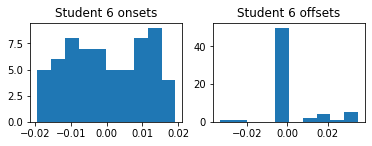

Onset Grade =  79.2 	 Offset Grade =  72.0


TF 1 Mark =  79.2 Sound Q Grade =  72.0
Final Mark =  2.7
ok1
0     0.000000
1    -0.000669
2     0.005363
3    -0.013753
4    -0.014172
5    -0.001372
6     0.016259
7    -0.004308
8     0.015000
9    -0.012075
10    0.012336
11    0.008957
12    0.007778
13    0.012188
14   -0.010011
15    0.019399
16    0.004422
17    0.002222
18   -0.006757
19    0.015896
20   -0.005000
21    0.010930
22    0.006372
23    0.010193
24   -0.009184
25    0.003458
26   -0.004331
27   -0.020000
28    0.002993
29   -0.010034
30    0.004376
31   -0.006213
32   -0.001803
33   -0.008390
34   -0.002948
35   -0.010011
36    0.016791
37   -0.019365
38    0.012993
39   -0.019615
40   -0.014161
41   -0.007540
42   -0.007528
43   -0.009728
44   -0.001927
45   -0.018696
46   -0.008685
47   -0.019274
48    0.003526
49   -0.006020
50   -0.010578
51    0.014875
52   -0.008503
53    0.017120
54   -0.008039
55   -0.010816
Name: onset dev, dtype: float64
-0.001572522339285969

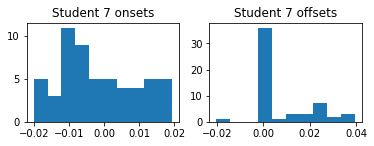

Onset Grade =  56.7 	 Offset Grade =  72.0


TF 1 Mark =  33.300000000000004 Sound Q Grade =  33.300000000000004
Final Mark =  0.9
ok1
0     0.007687
1    -0.005000
2    -0.015669
3     0.003741
4    -0.013991
        ...   
79   -0.014501
80   -0.013039
81    0.004184
82   -0.005805
83   -0.005374
Name: onset dev, Length: 84, dtype: float64
-0.0010357959047616763
ok3


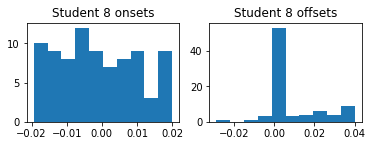

In [22]:
col_list = ["onset dev", "offset dev"]
sonset_deviations = []
soffset_deviations = []
# sonset_deviations,soffset_deviations
k=0
while k<9:
   sdeviatePath = 'drive/MyDrive/Bass/data/brown/brown_devs_student' + str(k)+ '.csv'
   sdf = pd.read_csv(sdeviatePath, usecols=col_list)
   sonset_dev_list = sdf["onset dev"]
   sonset_deviations.append(sonset_dev_list)
   soffset_dev_list = sdf["offset dev"] 
   soffset_deviations.append(soffset_dev_list)
   multiple_hist(sonset_dev_list,soffset_dev_list," onsets"," offsets",df_all,k)
   k+=1

In [23]:
df_all

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,Sound Quality Mark,finalMark
0,0,0.893,0.905,0.899,0.005,-0.003,0.006,0.005,-0.003,0.006,100.0,100.0,100.0,100.0,5.0
1,1,0.376,0.381,0.378,0.010,-0.002,0.011,0.022,0.021,0.024,72.0,90.0,72.0,79.2,2.7
2,2,0.571,0.571,0.571,0.010,-0.001,0.011,0.023,0.020,0.026,79.2,90.0,79.2,79.2,3.6
3,3,0.235,0.238,0.236,0.011,0.008,0.013,0.025,0.017,0.028,79.2,79.2,79.2,90.0,3.6
4,4,0.091,0.088,0.090,0.007,0.007,0.010,0.000,0.000,0.000,90.0,90.0,90.0,79.2,4.5
5,5,0.276,0.272,0.274,0.010,-0.000,0.012,0.017,0.016,0.021,72.0,79.2,79.2,79.2,3.6
6,6,0.464,0.435,0.449,0.010,0.000,0.011,0.025,0.017,0.026,72.0,79.2,79.2,90.0,3.6
7,7,0.376,0.381,0.378,0.010,-0.002,0.011,0.022,0.021,0.024,79.2,72.0,79.2,72.0,2.7
8,8,0.571,0.571,0.571,0.010,-0.001,0.011,0.023,0.020,0.026,56.7,72.0,33.3,33.3,0.9


In [24]:
print(df_all.index)
number_of_rows = len(df_all.index)
print(number_of_rows)
df_all

RangeIndex(start=0, stop=9, step=1)
9


,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,Sound Quality Mark,finalMark
0,0,0.893,0.905,0.899,0.005,-0.003,0.006,0.005,-0.003,0.006,100.0,100.0,100.0,100.0,5.0
1,1,0.376,0.381,0.378,0.010,-0.002,0.011,0.022,0.021,0.024,72.0,90.0,72.0,79.2,2.7
2,2,0.571,0.571,0.571,0.010,-0.001,0.011,0.023,0.020,0.026,79.2,90.0,79.2,79.2,3.6
3,3,0.235,0.238,0.236,0.011,0.008,0.013,0.025,0.017,0.028,79.2,79.2,79.2,90.0,3.6
4,4,0.091,0.088,0.090,0.007,0.007,0.010,0.000,0.000,0.000,90.0,90.0,90.0,79.2,4.5
5,5,0.276,0.272,0.274,0.010,-0.000,0.012,0.017,0.016,0.021,72.0,79.2,79.2,79.2,3.6
6,6,0.464,0.435,0.449,0.010,0.000,0.011,0.025,0.017,0.026,72.0,79.2,79.2,90.0,3.6
7,7,0.376,0.381,0.378,0.010,-0.002,0.011,0.022,0.021,0.024,79.2,72.0,79.2,72.0,2.7
8,8,0.571,0.571,0.571,0.010,-0.001,0.011,0.023,0.020,0.026,56.7,72.0,33.3,33.3,0.9


In [28]:
import csv  
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std= 
# statisticsGenerator(sonset_deviationsArray,sduration_deviationsArray," onsets", " durations",the_student_grades,sp,sr,sf)

def statisticsGenerator(deviationsArray1,deviationsArray2,title_text1,title_text2,df):
   header = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std",
             "Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," TF 1 Mark ","soundQualityMark"," finalMark"]

   studentStatisticsArray= []
   with open('drive/MyDrive/Bass/data/StudentStatistics_blend_brown.csv', 'w', encoding='UTF8') as f:
      idx = df.index

      number_of_rows = len(idx)
      print(number_of_rows)
      k=0

      writer = csv.writer(f)
      # write the header
      writer.writerow(header)

      studentStatistics = []
      onset_X = []  # Martis mark
      onset_amean = []
      onset_mean = []
      onset_std= []

      duration_X = [] # Martis mark
      duration_amean = []
      duration_mean = []
      duration_std= []
      list0 = df["onsetMark"].tolist()  
      list1 = df[" DurationMark"].tolist()  
      list2 = df[" TF 1 Mark "].tolist()  
      list3 = df["Sound Quality Mark"].tolist()  
      list4 = df[" finalMark"].tolist()  

      listp = df["precision"].tolist()  
      listr = df["recall"].tolist()  
      listf = df["f_measure_value"].tolist()  
      print("###################### number_of_rows",number_of_rows)
      while k < number_of_rows-1:
          studentStatistics.append(str(k+1))
          student_stats1 = [] # onsets
          student_stats2 = [] # durations

          plt.subplot(2,2,1)
          a = np.array(deviationsArray1[k])
          print(a[0:12])
          onset_m, onset_s = mean(a), sqrt(mean(a*a))
          onset_am= mean(abs(a))
          onset_summary= "Onset ABS  Mean: %f,Onset Mean: %f, Dev. from 0: %f" %(onset_am,onset_m, onset_s)
          title =   "Student " + str(k)+ title_text1

          onset_X.append( list0[k])  # Martis mark
          print("list0[k]")
          print(list0[k])
          onset_mean.append(onset_m)
          onset_amean.append(onset_am)
          onset_std.append(onset_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.subplot(2,2,2)
          a = np.array(deviationsArray2[k])
          duration_m, duration_s = mean(a), sqrt(mean(a*a))
          duration_am= mean(abs(a))
          duration_summary= "Offset Mean: %f, Dev. from 0: %f" %(duration_m, duration_s)
          title =   "Student " + str(k)+ title_text2
          print(title)
          duration_X.append( list1[k])  # Martis mark
          duration_mean.append(duration_m)
          duration_amean.append(duration_am)
          duration_std.append(duration_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.show()
          print("Onset Grade = ", list0[k],"\t" ,"Duration Grade = ", list1[k])
          print("\n")
          print(onset_summary)
          print("\n")
          print(duration_summary)
          print("\n")
          print("TF 1 Mark = ", list2[k],"Sound Control Grade = ", list3[k])
          print("Final Mark = ", list4[k])
          studentStatistics = []
          studentStatistics.append(str(k))
          studentStatistics.append(round(listp[k],3))
          print("////////////////////////////")
          print(round(listp[k],3))
          studentStatistics.append(round(listr[k],3))
          studentStatistics.append(round(listf[k],3))
          studentStatistics.append(round(onset_am,3))
          studentStatistics.append(round(onset_m,3))
          studentStatistics.append(round(onset_s,3))   
          studentStatistics.append(round(duration_am,3))                   
          studentStatistics.append(round(duration_m,3)) 
          studentStatistics.append(round(duration_s,3))   
          studentStatistics.append(list0[k])
          studentStatistics.append(list1[k])
          studentStatistics.append(list2[k])
          studentStatistics.append(list3[k])
          studentStatistics.append(list4[k])
          # write the data
          writer.writerow(studentStatistics)
          studentStatisticsArray.append(studentStatistics)
          k+=1
    
   return(onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,studentStatisticsArray,onset_amean, duration_amean)
# Capture a table of onset and grade


9
###################### number_of_rows 9
[-0.00511338 -0.00231293  0.00489796  0.00212018  0.01       -0.00566893
 -0.0062585  -0.00463719 -0.00399093  0.00520408 -0.00199546 -0.00375283]
list0[k]
100.0
Student 0 offset


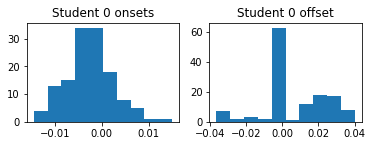

Onset Grade =  100.0 	 Duration Grade =  100.0


Onset ABS  Mean: 0.004587,Onset Mean: -0.002528, Dev. from 0: 0.005722


Offset Mean: 0.007186, Dev. from 0: 0.018169


TF 1 Mark =  100.0 Sound Control Grade =  100.0
Final Mark =  5.0
////////////////////////////
0.893
[ 0.         -0.00066893  0.00536281 -0.01375283 -0.01417234 -0.00137188
  0.0162585  -0.00430839  0.015      -0.01207483  0.0123356   0.00895692]
list0[k]
72.0
Student 1 offset


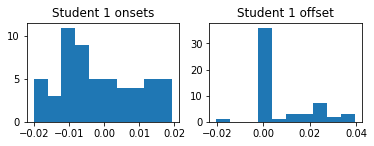

Onset Grade =  72.0 	 Duration Grade =  90.0


Onset ABS  Mean: 0.009553,Onset Mean: -0.001573, Dev. from 0: 0.011034


Offset Mean: 0.007699, Dev. from 0: 0.014919


TF 1 Mark =  72.0 Sound Control Grade =  79.2
Final Mark =  2.7
////////////////////////////
0.376
[ 0.00768707 -0.005      -0.01566893  0.0037415  -0.01399093  0.01800454
 -0.01875283 -0.00417234  0.00362812  0.0162585   0.01626984  0.00848073]
list0[k]
79.2
Student 2 offset


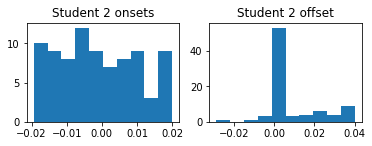

Onset Grade =  79.2 	 Duration Grade =  90.0


Onset ABS  Mean: 0.009737,Onset Mean: -0.001036, Dev. from 0: 0.011366


Offset Mean: 0.007442, Dev. from 0: 0.016045


TF 1 Mark =  79.2 Sound Control Grade =  79.2
Final Mark =  3.6
////////////////////////////
0.571
[-0.00510204 -0.01463719  0.01571429  0.00395692 -0.00722222 -0.00244898
  0.01290249  0.02        0.01011338  0.01452381  0.00614512  0.0179932 ]
list0[k]
79.2
Student 3 offset


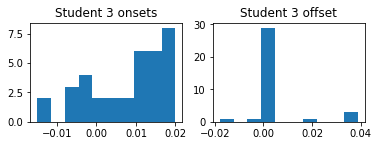

Onset Grade =  79.2 	 Duration Grade =  79.2


Onset ABS  Mean: 0.011267,Onset Mean: 0.007745, Dev. from 0: 0.012775


Offset Mean: 0.002986, Dev. from 0: 0.011572


TF 1 Mark =  79.2 Sound Control Grade =  90.0
Final Mark =  3.6
////////////////////////////
0.235
[ 0.00988662  0.01768707 -0.00010204  0.00212018  0.00036281  0.00511338
  0.01952381  0.01370748  0.0050907   0.00230159  0.00333333  0.005839  ]
list0[k]
90.0
Student 4 offset


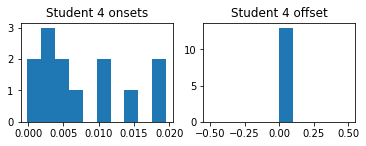

Onset Grade =  90.0 	 Duration Grade =  90.0


Onset ABS  Mean: 0.007332,Onset Mean: 0.007316, Dev. from 0: 0.009575


Offset Mean: 0.000000, Dev. from 0: 0.000000


TF 1 Mark =  90.0 Sound Control Grade =  79.2
Final Mark =  4.5
////////////////////////////
0.091
[ 9.8979590e-03  2.0000000e-02 -1.0668934e-02  3.7414970e-03
  1.1009070e-02  1.6247166e-02  1.6995460e-02 -1.2074830e-02
 -1.2664400e-02 -2.8117900e-03 -1.1340000e-05  1.4399090e-02]
list0[k]
72.0
Student 5 offset


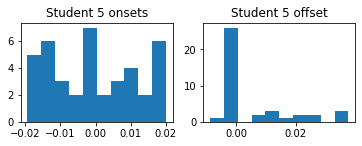

Onset Grade =  72.0 	 Duration Grade =  79.2


Onset ABS  Mean: 0.010424,Onset Mean: -0.000368, Dev. from 0: 0.012169


Offset Mean: 0.006308, Dev. from 0: 0.013004


TF 1 Mark =  79.2 Sound Control Grade =  79.2
Final Mark =  3.6
////////////////////////////
0.276
[ 0.01488662  0.00989796 -0.01287982 -0.00066893  0.00699547  0.00069161
 -0.01707483 -0.0026644   0.00895692  0.00277778  0.01498866 -0.01515873]
list0[k]
72.0
Student 6 offset


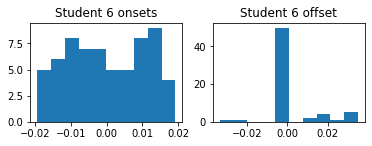

Onset Grade =  72.0 	 Duration Grade =  79.2


Onset ABS  Mean: 0.009614,Onset Mean: 0.000087, Dev. from 0: 0.010985


Offset Mean: 0.003614, Dev. from 0: 0.012163


TF 1 Mark =  79.2 Sound Control Grade =  90.0
Final Mark =  3.6
////////////////////////////
0.464
[ 0.         -0.00066893  0.00536281 -0.01375283 -0.01417234 -0.00137188
  0.0162585  -0.00430839  0.015      -0.01207483  0.0123356   0.00895692]
list0[k]
79.2
Student 7 offset


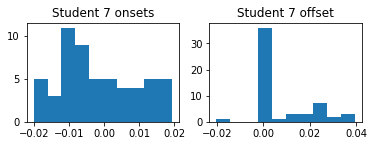

Onset Grade =  79.2 	 Duration Grade =  72.0


Onset ABS  Mean: 0.009553,Onset Mean: -0.001573, Dev. from 0: 0.011034


Offset Mean: 0.007699, Dev. from 0: 0.014919


TF 1 Mark =  79.2 Sound Control Grade =  72.0
Final Mark =  2.7
////////////////////////////
0.376


In [29]:
onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [ ]:
print(onset_grade_list)

In [ ]:
df_all

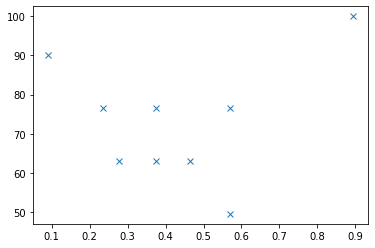

[100, 63, 76.5, 76.5, 90, 63, 63, 76.5, 49.5]


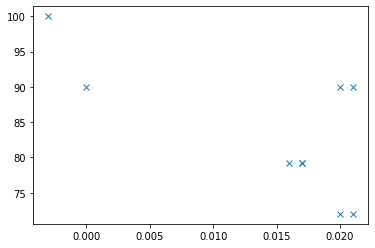

In [30]:

onset_mean_list = df_all["Onset Mean"].tolist()   
onset_amean_list = df_all["Onset ABS Mean"].tolist()   
#onset_grade_list = df_all["onsetMark"].tolist()
onset_grade_list = [100,63,76.5,76.5,90,63,63,76.5,49.5]

onset_precision_list = df_all["precision"].tolist()   

plt.plot(onset_precision_list,onset_grade_list, 'x')
plt.show()

Duration_mean_list = df_all["Duration Mean"].tolist()   
Duration_amean_list = df_all["Duration ABS Mean"].tolist()   
Duration_amean_list = df_all["Duration ABS Mean"].tolist()
Duration_grade_list = df_all[" DurationMark"].tolist()   
print(onset_grade_list)

plt.plot(Duration_mean_list,Duration_grade_list, 'x')
plt.show()

# I should try to plot Precision against  ONSET_GRADE(Y) vs PRECISION (X)
# I should try to plot Precision against  ONSET_GRADE(Y) vs ABSOLUTE MEAN (X)
# TRY TO EXPLAIN
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= 
#statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [31]:
import pandas as pd
#sonset_deviations,soffset_deviations

In [32]:
data_timing_onset0= { 'onsets0' :sonset_deviations[0]}
df = pd.DataFrame(data_timing_onset0,columns=['onsets0'])
fig = px.histogram(df, x="onsets0")
fig.show()

In [33]:

data_timing_duration0= { 'durations0' :soffset_deviations[0]}
df = pd.DataFrame(data_timing_duration0,columns=['durations0'])
fig = px.histogram(df, x="durations0")
fig.show()

In [34]:
dataset = pd.read_csv('drive/MyDrive/Bass/data/brown//StudentStatistics_brown.csv') 
#dataset = pd.read_csv('drive/MyDrive/Bass/data/StudentStatisticsBillie.csv')
header = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std",
             "Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," TF 1 Mark ","soundQualityMark"," finalMark"]

In [ ]:
dataset

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X = dataset[['P', 'R', 'F',  ' ABS Mean Onset','Mean  Onset','Std Onset',' ABS Mean Duration','Mean Duration','Std Duration']]
#X = dataset[['precision', 'recall', 'f_measure_value',  'Onset ABS Mean','Onset Mean','Onset Std']]
#X = dataset[['precision','recall','f_measure_value']]#,'Onset Mean','Onset Std']]
X = dataset[['precision','recall','f_measure_value']]#,]]
y=array(dataset['onsetMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# IEC PRF Mean Absolute Error: 12.079847760757067
# IEC PRF Root Mean Squared Error: 12.521853181718802

      Actual  Predicted
0  79.199997  77.533343
1  79.199997  81.108423
2  72.000000  77.533343
Mean Absolute Error: 3.0361409065693437
Root Mean Squared Error: 3.513673675593084


In [ ]:
dataset

In [38]:
#X = dataset[['precision','recall','f_measure_value','Duration ABS Mean','Duration Mean','Duration Std']]
X = dataset[['precision','recall','f_measure_value']]
y=array(dataset[' DurationMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

X = dataset[['precision','recall','f_measure_value','Duration ABS Mean']]
y=array(dataset[' DurationMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))





   Actual  Predicted
0    72.0  79.563465
1    90.0  86.555311
2    90.0  79.563465
Mean Absolute Error: 7.1482296205929385
Root Mean Squared Error: 7.702665038180838
   Actual  Predicted
0    72.0  84.431133
1    90.0  72.143675
2    90.0  84.431133
Mean Absolute Error: 11.952108445806317
Root Mean Squared Error: 12.966542891178618


In [ ]:
dataset

In [ ]:
X = dataset[['precision','recall','f_measure_value','Onset ABS Mean','Duration ABS Mean']]
y=array(dataset[' finalMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [44]:


X = dataset[['precision','recall','f_measure_value']]
y=array(dataset[' TF 1 Mark '])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

      Actual  Predicted
0  79.199997  76.876749
1  79.199997  77.229587
2  72.000000  76.876749
Mean Absolute Error: 3.0568024082374166
Root Mean Squared Error: 3.319772916301323
